In [1]:
(ns enigmatic-peak
  (:require [opencv4.core :refer :all]
            [opencv4.utils :as u]))

nil

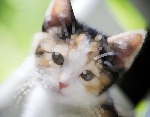

In [2]:
(-> 
  "resources/images/cat2.png"
  (imread)
  (u/resize-by 0.15)
  (dilate! (get-structuring-element MORPH_RECT (new-size 3 3)))
  (u/>>>))

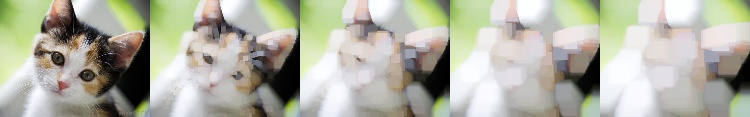

In [3]:

; why it is interesting to use clojure here
(defn dilate1[src dilation-size]
  (->
  src
  clone
  (dilate!
    (get-structuring-element
      MORPH_RECT
      (new-size (inc (* 2 dilation-size)) (inc (* 2 dilation-size)))))))

(-> 
  "resources/images/cat2.png"
  (imread)
  (u/resize-by 0.15)
  ((fn[x]
    (into []
	 (map
     (partial dilate1 x)
     (map (partial * 2 ) (range 5))))))
  (hconcat!)
  (u/>>>))

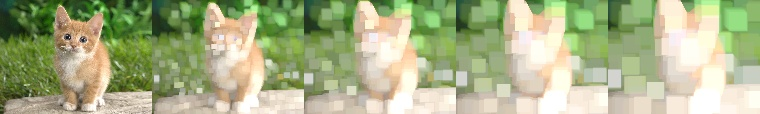

In [4]:
(-> 
  "resources/images/cat.jpg"
  (imread)
  (u/resize-by 0.095)
  ((fn[x]
    (into []
	 (map
     (partial dilate1 x)
     (map (partial * 2 ) (range 5))))))
  (hconcat!)
  (u/>>>))